<a href="https://colab.research.google.com/github/nitishnarayanan002/Waste_Segg/blob/main/CNN_Assg_Waste_Segregation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [10]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [11]:
# Import essential libraries
# Core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Machine Learning and Deep Learning
import tensorflow as tf
from tensorflow import keras
from sklearn import __version__ as sklearn_version


Load the dataset.

In [12]:
import zipfile

# Path to your uploaded zip file (adjust if folder name is different)
zip_path = '/content/data.zip'

# Folder to extract to
extract_to = '/content/waste_data'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [13]:
import os
for root, dirs, files in os.walk(extract_to):
    print(f"\n📁 {root}")
    for file in files:
        print(f"  └─ {file}")



📁 /content/waste_data

📁 /content/waste_data/data

📁 /content/waste_data/data/Plastic
  └─ file_561.png
  └─ file_725.png
  └─ file_604.png
  └─ file_1781.png
  └─ file_1756.png
  └─ file_40.png
  └─ file_422.png
  └─ file_982.png
  └─ file_1377.png
  └─ file_1078.png
  └─ file_4.png
  └─ file_1302.png
  └─ file_1772.png
  └─ file_1703.png
  └─ file_1188.png
  └─ file_2179.png
  └─ file_494.png
  └─ file_764.png
  └─ file_1033.png
  └─ file_1126.png
  └─ file_1001.png
  └─ file_958.png
  └─ file_554.png
  └─ file_896.png
  └─ file_1358.png
  └─ file_1368.png
  └─ file_172.png
  └─ file_525.png
  └─ file_1133.png
  └─ file_2032.png
  └─ file_1660.png
  └─ file_1164.png
  └─ file_2056.png
  └─ file_1560.png
  └─ file_705.png
  └─ file_1199.png
  └─ file_1513.png
  └─ file_385.png
  └─ file_966.png
  └─ file_357.png
  └─ file_606.png
  └─ file_469.png
  └─ file_2234.png
  └─ file_963.png
  └─ file_1519.png
  └─ file_162.png
  └─ file_22.png
  └─ file_2113.png
  └─ file_317.png
  └─ file_

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [23]:
# Create a function to load the raw images
from PIL import Image
import numpy as np
import os

def load_images_from_folder(folder_path, target_size=(128, 128), as_array=True):
    """
    Loads images from subfolders within a given folder and returns image arrays and labels.

    Args:
        folder_path (str): Path to the main folder containing class subfolders.
        target_size (tuple): Desired image size (width, height).
        as_array (bool): If True, returns numpy arrays. If False, returns PIL images.

    Returns:
        X: List or array of images.
        y: List of labels (folder names).
    """
    X = []
    y = []

    class_names = os.listdir(folder_path)
    for label in class_names:
        class_dir = os.path.join(folder_path, label)
        if not os.path.isdir(class_dir):
            continue

        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(target_size)

                X.append(np.array(img) if as_array else img)
                y.append(label)
            except Exception as e:
                print(f"⚠️ Error loading image {file_path}: {e}")

    return np.array(X), np.array(y)



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Perform any operations, if needed, on the images and labels to get them into the desired format.

In [15]:
# Get the images and their labels

image_dir = '/content/waste_data/data'

X, y = load_images_from_folder(image_dir, target_size=(128, 128))

print("Loaded images:", X.shape)
print("Total Lables:", len(y))
print("Labels:", np.unique(y))


Loaded images: (7625, 128, 128, 3)
Total Lables: 7625
Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

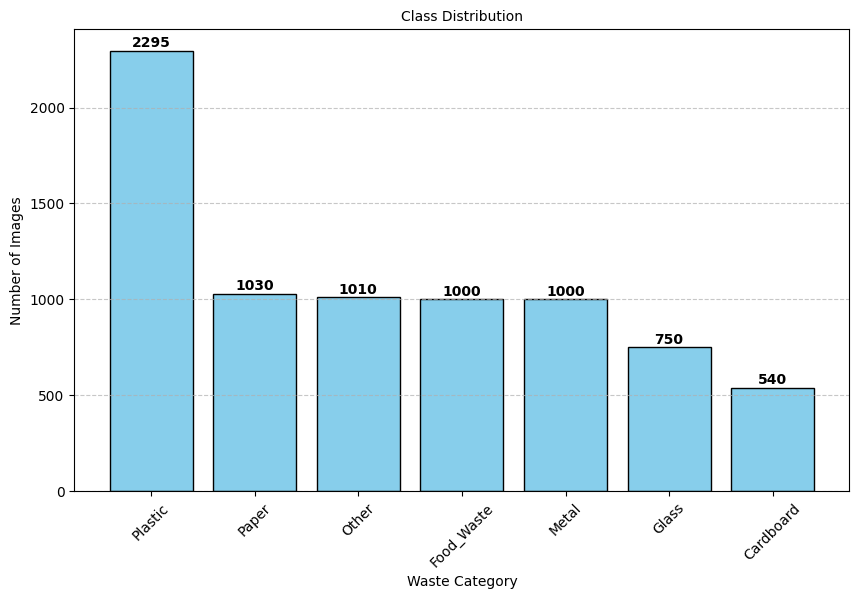

In [16]:
# Visualise Data Distribution

label_series = pd.Series(y)
label_counts = label_series.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
# Add numbers above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Class Distribution', fontsize = 10)
plt.xlabel('Waste Category', fontsize=10)
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [17]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", np.unique(y))


X shape: (7625, 128, 128, 3)
y shape: (7625,)
Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


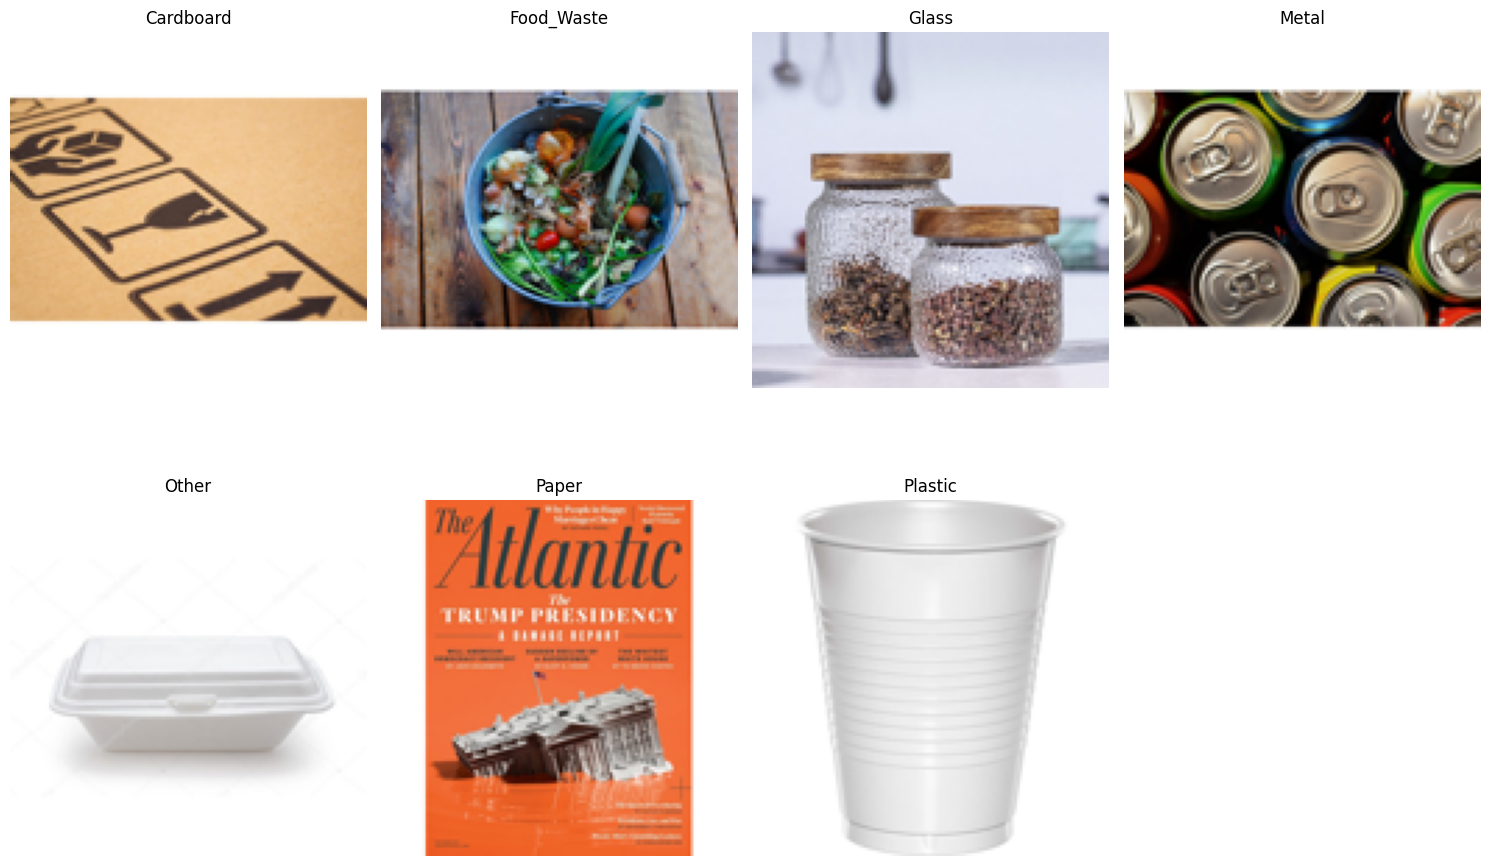

In [18]:
# Visualise Sample Images (across different labels)

%matplotlib inline

# Get one image per label (for now)
labels = np.unique(y)
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    # Get one random image from this class
    idx = np.random.choice(np.where(y == label)[0])

    plt.subplot(2, 4, i+1)
    plt.imshow(X[idx].astype('uint8'))
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [19]:
def find_image_dimension_extremes_verbose(root_dir):
    min_width, min_height = float('inf'), float('inf')
    max_width, max_height = 0, 0
    image_count = 0

    print(f"Scanning folder: {root_dir}")

    for subdir, _, files in os.walk(root_dir):
        print(f" Entering directory: {subdir}, Files: {len(files)}")
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size

                    min_width = min(min_width, width)
                    min_height = min(min_height, height)
                    max_width = max(max_width, width)
                    max_height = max(max_height, height)

                    image_count += 1
            except Exception as e:
                print(f" Could not process {file_path}: {e}")

    if image_count == 0:
        print(" No images were successfully processed.")
    else:
        print(f"\n Total images scanned: {image_count}")
        print(f" Smallest image dimensions: {min_width} x {min_height}")
        print(f" Largest image dimensions: {max_width} x {max_height}")

# Run the updated function
find_image_dimension_extremes_verbose('/content/waste_data/data')


Scanning folder: /content/waste_data/data
 Entering directory: /content/waste_data/data, Files: 0
 Entering directory: /content/waste_data/data/Plastic, Files: 2295
 Entering directory: /content/waste_data/data/Glass, Files: 750
 Entering directory: /content/waste_data/data/Paper, Files: 1030
 Entering directory: /content/waste_data/data/Other, Files: 1010
 Entering directory: /content/waste_data/data/Metal, Files: 1000
 Entering directory: /content/waste_data/data/Cardboard, Files: 540
 Entering directory: /content/waste_data/data/Food_Waste, Files: 1000

 Total images scanned: 7625
 Smallest image dimensions: 256 x 256
 Largest image dimensions: 256 x 256


In [20]:
# Resize the image dimensions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/waste_data/data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/waste_data/data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [24]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X_resized, y_resized = load_images_from_folder('/content/waste_data/data', target_size=(128, 128))


# Step 1: Encode class names to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resized)

# Step 2: Convert to one-hot encoded labels
y_onehot = to_categorical(y_encoded)

# Check shape and class mapping
print(" Encoded shape:", y_onehot.shape)
print("Class mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


 Encoded shape: (7625, 7)
Class mapping: {np.str_('Cardboard'): 0, np.str_('Food_Waste'): 1, np.str_('Glass'): 2, np.str_('Metal'): 3, np.str_('Other'): 4, np.str_('Paper'): 5, np.str_('Plastic'): 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [26]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

# Split into training and validation sets (e.g., 80/20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot,
    test_size=0.2,
    stratify=y_onehot,
    random_state=42
)

# Confirm the split
print(f" Training set shape: {X_train.shape}, {y_train.shape}")
print(f" Validation set shape: {X_val.shape}, {y_val.shape}")

 Training set shape: (6100, 128, 128, 3), (6100, 7)
 Validation set shape: (1525, 128, 128, 3), (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [27]:
# Build and compile the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)

# Define the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,727 (24.87 MB)

 Trainable params: 6,518,279 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [28]:
# Training

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.2378 - loss: 5.9021 - val_accuracy: 0.3069 - val_loss: 1.8484
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2945 - loss: 1.8448 - val_accuracy: 0.2931 - val_loss: 1.8785
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3026 - loss: 1.7711 - val_accuracy: 0.3193 - val_loss: 1.8609
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3217 - loss: 1.7461 - val_accuracy: 0.1862 - val_loss: 3.6411
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3074 - loss: 1.7690 - val_accuracy: 0.2800 - val_loss: 3.1973
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3152 - loss: 1.7214 - val_accuracy: 0.3187 - val_loss: 1.8222
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3044 - loss: 1.7299 - val_accuracy: 0.3121 - val_loss: 1.8056
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3079 - loss: 1.6799 - val_acc

| Metric                    | Value                     |
| ------------------------- | ------------------------- |
| **Final train acc**       | `~39.6%`                  |
| **Final val acc**         | `~42.3%`                  |
| **Best val loss**         | `~1.5395` (Epoch 15)      |
| **Worst val loss**        | `~3.6411` (Epoch 4)       |


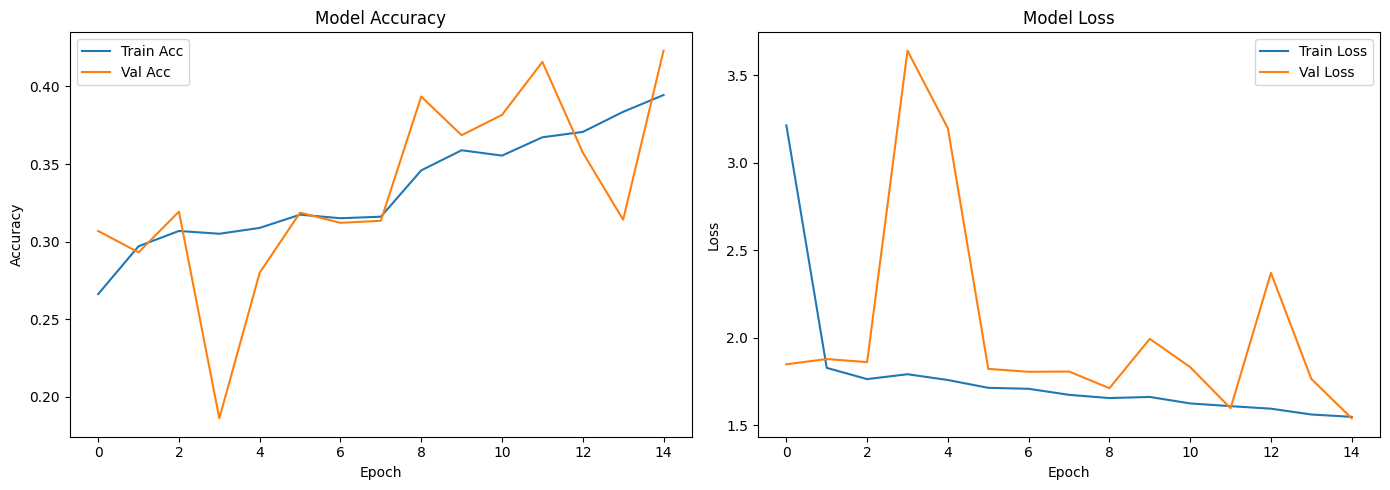

In [29]:
def plot_training(history):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [30]:
# Evaluate on the test set; display suitable metrics

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"\n Final Evaluation:\nValidation Accuracy: {val_accuracy:.4f}\nValidation Loss: {val_loss:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4348 - loss: 1.5108

 Final Evaluation:
Validation Accuracy: 0.4230
Validation Loss: 1.5395


In [31]:
#Predictions

# Predict class probabilities
y_pred_probs = model.predict(X_val)

# Convert one-hot labels and predictions to class indices
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_val.argmax(axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


 Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.00      0.00      0.00       108
  Food_Waste       0.39      0.68      0.49       200
       Glass       1.00      0.06      0.11       150
       Metal       0.00      0.00      0.00       200
       Other       0.54      0.27      0.36       202
       Paper       0.71      0.17      0.27       206
     Plastic       0.40      0.90      0.56       459

    accuracy                           0.42      1525
   macro avg       0.44      0.30      0.26      1525
weighted avg       0.44      0.42      0.33      1525



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


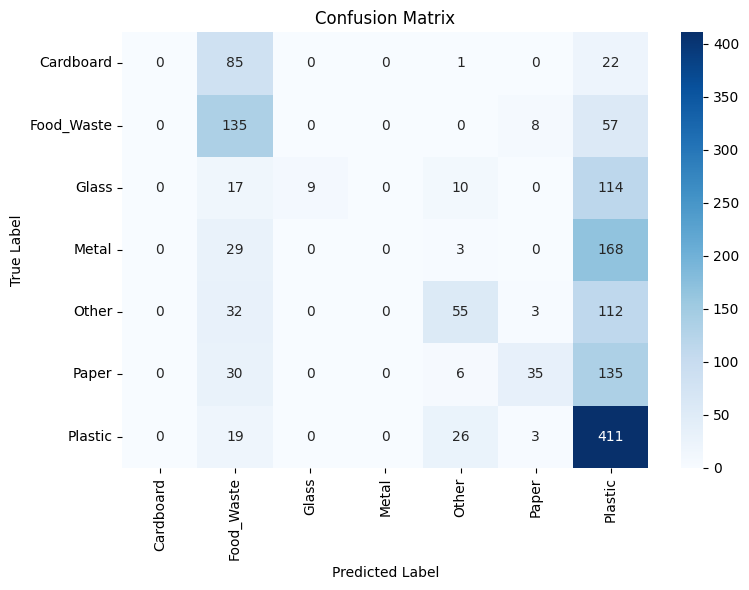

In [32]:
#Classification and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class labels
class_names = label_encoder.classes_

# Classification report
print(" Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


| Class                       | Precision | Recall | F1-score  | Notes                                                                                   |
| --------------------------- | --------- | ------ | --------- | --------------------------------------------------------------------------------------- |
| **Plastic**                 | 0.40      | 0.90   | 0.56      |  Model strongly biased toward this class (likely over-represented)                    |
| **Glass**                   | 1.00      | 0.06   | 0.11      |  Almost never predicted correctly despite perfect precision (rarely predicted at all) |
| **Metal**                   | 0.00      | 0.00   | 0.00      |  Not learned at all — needs data or feature help                                       |
| **Food\_Waste**             | 0.39      | 0.68   | 0.49      |  Decent recall, model is identifying it well                                          |
| **Cardboard, Paper, Other** | Mixed     | Mixed  | 0.27–0.36 |  Model struggles here; may be similar in visual features                              |


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [33]:
# Define augmentation steps to augment images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation strategy for training data
train_aug = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=15,           # Rotate images up to 15 degrees
    width_shift_range=0.1,       # Shift width by 10%
    height_shift_range=0.1,      # Shift height by 10%
    zoom_range=0.1,              # Random zoom
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels after rotation/shift
)

# For validation, only normalize
val_aug = ImageDataGenerator(rescale=1./255)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [34]:
# Create a function to augment the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_augmented_generators(X_train, y_train, X_val, y_val, batch_size=32):
    """
    Creates ImageDataGenerators for training and validation with augmentation applied to training only.

    Args:
        X_train (ndarray): Training images.
        y_train (ndarray): One-hot encoded training labels.
        X_val (ndarray): Validation images.
        y_val (ndarray): One-hot encoded validation labels.
        batch_size (int): Batch size to use for training and validation.

    Returns:
        train_generator, val_generator: ImageDataGenerator iterators
    """

    # Training augmentation
    train_aug = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Validation — no augmentation, just rescaling
    val_aug = ImageDataGenerator(rescale=1./255)

    # Create data generators
    train_generator = train_aug.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
    val_generator = val_aug.flow(X_val, y_val, batch_size=batch_size, shuffle=False)

    return train_generator, val_generator



In [36]:
# Create the augmented training dataset

# Create augmented generators
train_generator, val_generator = create_augmented_generators(
    X_train, y_train,
    X_val, y_val,
    batch_size=32
)

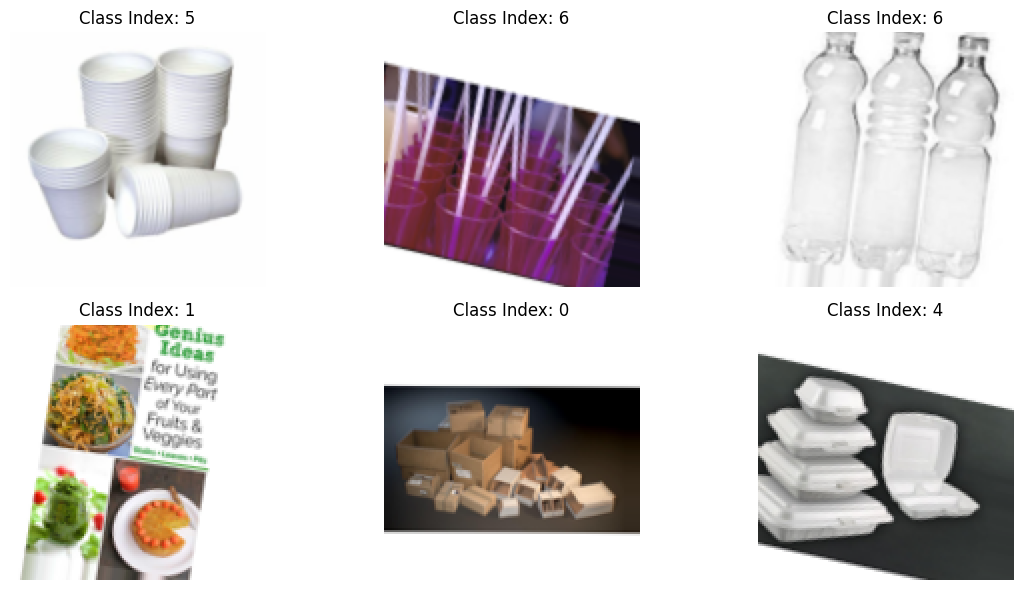

In [37]:
#Visualize Augmented Images
import matplotlib.pyplot as plt

# Get one batch of augmented images
images, labels = next(train_generator)

# Plot the first 6 augmented images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class Index: {labels[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


##### **4.1.2**

Train the model on the new augmented dataset.

In [38]:
# Train the model using augmented images

model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - accuracy: 0.3199 - loss: 1.7492 - val_accuracy: 0.3010 - val_loss: 2.0039
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.3164 - loss: 1.7393 - val_accuracy: 0.3010 - val_loss: 2.1985
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 141ms/step - accuracy: 0.3455 - loss: 1.6804 - val_accuracy: 0.3030 - val_loss: 1.8584
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.3503 - loss: 1.6757 - val_accuracy: 0.2905 - val_loss: 1.9370
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.3528 - loss: 1.6697 - val_accuracy: 0.3875 - val_loss: 1.6318
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.3701 - loss: 1.6372 - val_accuracy: 0.3154 - val_loss: 2.5301
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.3657 - loss: 1.6329 - val_accuracy: 0.2754 - val_loss: 1.8202
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 141ms/step - accuracy: 0.3628 - loss: 1

| Metric                  | Value (Final Epoch) |
| ----------------------- | ------------------- |
| **Training Accuracy**   | `~38.9%`            |
| **Validation Accuracy** | `~40.5%`            |
| **Best Val Accuracy**   | `~44.9%` (Epoch 14) |
| **Best Val Loss**       | `~1.4787`           |


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Insights from Data Exploration**


*   The dataset consists of 7 waste categories: Cardboard, Food_Waste, Glass,Metal, Other, Paper, and Plastic.
*   A total of 7,625 labeled images were extracted, with image dimensions uniformly sized at 256×256 pixels.

*   The class distribution was imbalanced, with categories like Plastic and Food_Waste being overrepresented compared to classes like Cardboard and Metal.
*   Visual inspection revealed that some classes shared similar visual features, which may increase the complexity of classification.

**Model Training Results**


*   A custom Convolutional Neural Network (CNN) was built with:
1.   3 convolutional layers, each followed by Batch Normalization, MaxPooling, and Dropout.
2.   A fully connected layer (Dense) with 256 neurons and a final softmax layer for 7-class classification.


*   The model was trained on augmented images using Keras' ImageDataGenerator to improve generalization
*   Training accuracy reached ~ 38.9%, and validation accuracy peaked at ~ 44.9%, showing improvement over the non-augmented baseline (~42.3%).


*   The classification report indicated strong prediction for Plastic (high recall), but weak performance on underrepresented or visually ambiguous classes such as Metal and Glass
*   Data augmentation helped, but fluctuations in validation loss suggest that further improvements could be achieved through:


1.   Class weighting, to handle imbalance
2.   Advanced architectures (e.g., transfer learning with MobileNet or ResNet)
3.  Hyperparameter tuning and more aggressive regularization

















**Summary**

The project successfully demonstrated the application of CNNs for waste classification using image data. The model showed moderate accuracy with room for improvement, and key insights into class imbalance and feature similarity will guide future enhancements.